In [1]:
Today = "5/03/2024"

def portfolio_input():
    global portfolio_size
    portfolio_size = input("Enter the value of your portfolio:")

    try:
        val = float(portfolio_size)
    except ValueError:
        print("That's not a number! \n Try again:")
        portfolio_size = input("Enter the value of your portfolio:")

portfolio_input()
print("$",portfolio_size)

Enter the value of your portfolio:250000
$ 250000
$ 250000


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import requests
import math
from scipy import stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime as dt
from requests.exceptions import HTTPError
import statsmodels.api as sm

### Getting all tickers from ASX 200

In [3]:

ASX100_wiki_url = 'https://en.wikipedia.org/wiki/S%26P/ASX_200'
ASX100_wiki_df_list = pd.read_html(ASX100_wiki_url)

ASX_df = ASX100_wiki_df_list[1]

ASX_df = ASX_df[['Code', 'Sector', 'Market Capitalisation']]


# Owen wants 100% socially conscious - no polluters, no animal or human rights concerns, no mining or anything that directly alters the Earth
ASX_df = ASX_df[~ASX_df['Sector'].isin(['Materials', 'Energy', 'Utilities'])]


ASX_df

,Code,Sector,Market Capitalisation
0,A2M,Consumer Staples,4.222573e+09
2,ABP,Real Estate,2.504890e+09
4,AIA,Industrials,1.042566e+10
7,ALL,Consumer Discretionary,2.596959e+10
8,ALQ,Industrials,5.996552e+09
...,...,...,...
194,WOW,Consumer Staples,3.777030e+10
196,WPR,Real Estate,1.756310e+09
197,WTC,Information Technology,5.798960e+09
198,XRO,Information Technology,6.685840e+09


,Code,Sector,Market Capitalisation
0,A2M,Consumer Staples,4.222573e+09
2,ABP,Real Estate,2.504890e+09
4,AIA,Industrials,1.042566e+10
7,ALL,Consumer Discretionary,2.596959e+10
8,ALQ,Industrials,5.996552e+09
...,...,...,...
194,WOW,Consumer Staples,3.777030e+10
196,WPR,Real Estate,1.756310e+09
197,WTC,Information Technology,5.798960e+09
198,XRO,Information Technology,6.685840e+09


In [4]:
stockList = ASX_df['Code'].values
tickers = [stock + '.AX' for stock in stockList]
tickers

['A2M.AX',
 'ABP.AX',
 'AIA.AX',
 'ALL.AX',
 'ALQ.AX',
 'ALU.AX',
 'ALX.AX',
 'AMP.AX',
 'ANN.AX',
 'ANZ.AX',
 'APE.AX',
 'SQ2.AX',
 'ARB.AX',
 'ARF.AX',
 'ASX.AX',
 'AUB.AX',
 'AZJ.AX',
 'BAP.AX',
 'BEN.AX',
 'BGA.AX',
 'BKL.AX',
 'BOQ.AX',
 'BRN.AX',
 'BRG.AX',
 'BWP.AX',
 'BXB.AX',
 'CAR.AX',
 'CBA.AX',
 'CCP.AX',
 'CCX.AX',
 'CGC.AX',
 'CGF.AX',
 'CHC.AX',
 'CIP.AX',
 'CKF.AX',
 'CLW.AX',
 'CMW.AX',
 'CNI.AX',
 'CNU.AX',
 'COH.AX',
 'COL.AX',
 'CPU.AX',
 'CQR.AX',
 'CSL.AX',
 'CTD.AX',
 'CUV.AX',
 'CWY.AX',
 'DHG.AX',
 'DMP.AX',
 'DOW.AX',
 'DXS.AX',
 'EDV.AX',
 'ELD.AX',
 'EML.AX',
 'EVT.AX',
 'FBU.AX',
 'FLT.AX',
 'FPH.AX',
 'GMG.AX',
 'GNC.AX',
 'GOZ.AX',
 'GPT.AX',
 'GUD.AX',
 'HDN.AX',
 'HLS.AX',
 'HMC.AX',
 'HUB.AX',
 'HVN.AX',
 'IAG.AX',
 'IEL.AX',
 'IFL.AX',
 'IMU.AX',
 'INA.AX',
 'ING.AX',
 'IPH.AX',
 'IRE.AX',
 'IVC.AX',
 'JBH.AX',
 'JHG.AX',
 'KLS.AX',
 'LIC.AX',
 'LLC.AX',
 'LNK.AX',
 'MFG.AX',
 'MGR.AX',
 'MP1.AX',
 'MPL.AX',
 'MQG.AX',
 'MTS.AX',
 'NAB.AX',
 'NAN.AX',

['A2M.AX',
 'ABP.AX',
 'AIA.AX',
 'ALL.AX',
 'ALQ.AX',
 'ALU.AX',
 'ALX.AX',
 'AMP.AX',
 'ANN.AX',
 'ANZ.AX',
 'APE.AX',
 'SQ2.AX',
 'ARB.AX',
 'ARF.AX',
 'ASX.AX',
 'AUB.AX',
 'AZJ.AX',
 'BAP.AX',
 'BEN.AX',
 'BGA.AX',
 'BKL.AX',
 'BOQ.AX',
 'BRN.AX',
 'BRG.AX',
 'BWP.AX',
 'BXB.AX',
 'CAR.AX',
 'CBA.AX',
 'CCP.AX',
 'CCX.AX',
 'CGC.AX',
 'CGF.AX',
 'CHC.AX',
 'CIP.AX',
 'CKF.AX',
 'CLW.AX',
 'CMW.AX',
 'CNI.AX',
 'CNU.AX',
 'COH.AX',
 'COL.AX',
 'CPU.AX',
 'CQR.AX',
 'CSL.AX',
 'CTD.AX',
 'CUV.AX',
 'CWY.AX',
 'DHG.AX',
 'DMP.AX',
 'DOW.AX',
 'DXS.AX',
 'EDV.AX',
 'ELD.AX',
 'EML.AX',
 'EVT.AX',
 'FBU.AX',
 'FLT.AX',
 'FPH.AX',
 'GMG.AX',
 'GNC.AX',
 'GOZ.AX',
 'GPT.AX',
 'GUD.AX',
 'HDN.AX',
 'HLS.AX',
 'HMC.AX',
 'HUB.AX',
 'HVN.AX',
 'IAG.AX',
 'IEL.AX',
 'IFL.AX',
 'IMU.AX',
 'INA.AX',
 'ING.AX',
 'IPH.AX',
 'IRE.AX',
 'IVC.AX',
 'JBH.AX',
 'JHG.AX',
 'KLS.AX',
 'LIC.AX',
 'LLC.AX',
 'LNK.AX',
 'MFG.AX',
 'MGR.AX',
 'MP1.AX',
 'MPL.AX',
 'MQG.AX',
 'MTS.AX',
 'NAB.AX',
 'NAN.AX',

## Getting Ratios for ASX stocks

In [6]:
# beta
# trailingPE
# marketCap
# priceToSalesTrailing12Months
# priceToBook
# debtToEquity
# returnOnAssets
# returnOnEquity
# enterpriseToRevenue

metrics = [
    'beta', 'trailingPE', 'marketCap',
    'priceToSalesTrailing12Months', 'priceToBook',
    'debtToEquity', 'returnOnAssets', 'returnOnEquity',
    'enterpriseToRevenue', 'pegRatio', 'currentPrice'
]

# Create an empty dictionary to store the data
data_dict = {metric: [] for metric in metrics}
data_dict['Ticker'] = []

# Iterate through the tickers and retrieve the data
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        data_dict['Ticker'].append(ticker)
        for metric in metrics:
            if metric in info:
                data_dict[metric].append(info[metric])
            else:
                data_dict[metric].append(None)
    except HTTPError as e:
        if e.response.status_code == 404:
            print(f"Skipping {ticker} due to 404 Client Error.")
            continue

# Create a DataFrame from the collected data
df = pd.DataFrame(data_dict)


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABP.AX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABP.AX&crumb=7UXW5lXHiqM
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABP.AX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABP.AX&crumb=7UXW5lXHiqM
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BKL.AX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BKL.AX&crumb=7UXW5lXHiqM
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BKL.AX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomai

In [ ]:
# import yfinance as yf
# import pandas as pd

# # List of metrics
# metrics = [
#     'beta', 'trailingPE', 'marketCap',
#     'priceToSalesTrailing12Months', 'priceToBook',
#     'debtToEquity', 'returnOnAssets', 'returnOnEquity',
#     'enterpriseToRevenue', 'pegRatio', 'previousClose'
# ]

# # Create an empty dictionary to store the data
# data_dict = {metric: [] for metric in metrics}
# data_dict['Ticker'] = []

# # Iterate through the tickers and retrieve the data
# for ticker in tickers:
#     try:
#         stock = yf.Ticker(ticker)
#         info = stock.info
#         data_dict['Ticker'].append(ticker)
#         for metric in metrics:
#             if metric == 'previousClose':
#                 try:
#                     # Get current price instead of previous close
#                     current_price = stock.history(period='1d')['Close'][0]
#                     data_dict[metric].append(current_price)
#                 except IndexError:
#                     # Handle case when no trading data is available
#                     data_dict[metric].append(None)
#             elif metric in info:
#                 data_dict[metric].append(info[metric])
#             else:
#                 data_dict[metric].append(None)
#     except Exception as e:
#         print(f"Skipping {ticker} due to error: {e}")
#         continue

# # Create a DataFrame from the collected data
# df = pd.DataFrame(data_dict)


In [7]:
pd.set_option('display.max_rows', None)
df = df.dropna()
df

,beta,trailingPE,marketCap,priceToSalesTrailing12Months,priceToBook,debtToEquity,returnOnAssets,returnOnEquity,enterpriseToRevenue,pegRatio,currentPrice,Ticker
3,0.831,19.886877,2.807280e+10,4.459043,4.237778,39.873,0.10027,0.22812,4.537,1.59,43.950,ALL.AX
4,1.149,25.157406,6.577422e+09,2.764901,4.631776,111.045,0.08673,0.19503,3.332,6.47,13.585,ALQ.AX
5,0.507,81.475000,8.599002e+09,30.460293,27.237778,3.071,0.13507,0.23259,29.820,1.42,65.180,ALU.AX
6,0.750,24.250000,7.740178e+09,57.762524,1.241275,27.592,-0.00039,0.04028,68.703,0.62,5.335,ALX.AX
7,0.678,110.500010,3.028893e+09,1.017773,0.781471,746.464,0.02314,0.00472,10.080,1.27,1.105,AMP.AX
8,0.507,18.584000,2.912810e+09,1.815174,1.837671,31.886,0.04811,0.06645,2.030,4.54,23.230,ANN.AX
10,1.513,12.713635,3.617696e+09,0.366904,2.828681,204.865,0.07797,0.23484,0.624,12.69,13.985,APE.AX
12,0.795,36.133930,3.327460e+09,4.930797,5.233416,6.132,0.11145,0.15092,4.988,2.40,40.470,ARB.AX
13,1.088,29.846155,1.377982e+09,18.423944,1.305958,29.640,0.02688,0.03847,24.316,4.10,3.880,ARF.AX
14,0.283,27.469389,1.302894e+10,8.605076,3.568210,2.058,0.04324,0.13017,7.523,9.93,67.300,ASX.AX


,beta,trailingPE,marketCap,priceToSalesTrailing12Months,priceToBook,debtToEquity,returnOnAssets,returnOnEquity,enterpriseToRevenue,pegRatio,currentPrice,Ticker
3,0.831,19.886877,2.807280e+10,4.459043,4.237778,39.873,0.10027,0.22812,4.537,1.59,43.950,ALL.AX
4,1.149,25.157406,6.577422e+09,2.764901,4.631776,111.045,0.08673,0.19503,3.332,6.47,13.585,ALQ.AX
5,0.507,81.475000,8.599002e+09,30.460293,27.237778,3.071,0.13507,0.23259,29.820,1.42,65.180,ALU.AX
6,0.750,24.250000,7.740178e+09,57.762524,1.241275,27.592,-0.00039,0.04028,68.703,0.62,5.335,ALX.AX
7,0.678,110.500010,3.028893e+09,1.017773,0.781471,746.464,0.02314,0.00472,10.080,1.27,1.105,AMP.AX
8,0.507,18.584000,2.912810e+09,1.815174,1.837671,31.886,0.04811,0.06645,2.030,4.54,23.230,ANN.AX
10,1.513,12.713635,3.617696e+09,0.366904,2.828681,204.865,0.07797,0.23484,0.624,12.69,13.985,APE.AX
12,0.795,36.133930,3.327460e+09,4.930797,5.233416,6.132,0.11145,0.15092,4.988,2.40,40.470,ARB.AX
13,1.088,29.846155,1.377982e+09,18.423944,1.305958,29.640,0.02688,0.03847,24.316,4.10,3.880,ARF.AX
14,0.283,27.469389,1.302894e+10,8.605076,3.568210,2.058,0.04324,0.13017,7.523,9.93,67.300,ASX.AX


### This algorithmic quantitative value strategy will use the following ratios and conditions:

- peRatioTTM: around 20-25

- pegRatio: lower than 1

- returnOnAssetsTTM: highest

- returnOnEquityTTM: around 0.15-0.20

- DebtToEquity: around 0.4-0.6 (adding industry specific)

- priceToBookRatioTTM: below 1

- priceToSalesRatioTTM: below 1

- Beta: closest to zero
	

In [8]:
rv_columns = [
    'Ticker',
    'Price',
    'MktCap',
    'Number of Shares to Buy', 
    'peRatio',
    'PE Score',
    'pegRatio',
    'PEG Score',
    'returnOnAssets',
    'ROA Score',
    'returnOnEquity',
    'ROE Score',
    'enterpriseToRevenue',
    'ER Score',
    'PriceToBook Ratio',
    'PB Score',
    'PriceToSales Ratio',
    'PS Score',
    'Beta',
    'Beta Score',
    'RV Score'
]
rv_dataframe = pd.DataFrame(columns = rv_columns)

In [9]:
rv_dataframe[['Ticker', 
              'Price',
              'MktCap',
              'Beta', 
              'peRatio', 
              'pegRatio', 
              'returnOnAssets', 
              'returnOnEquity', 
              'enterpriseToRevenue', 
              'PriceToBook Ratio', 
              'PriceToSales Ratio']] = df[['Ticker', 
                                                  'currentPrice',
                                           'marketCap',
                                                  'beta', 
                                                  'trailingPE', 
                                                  'pegRatio', 
                                                  'returnOnAssets', 
                                                  'returnOnEquity', 
                                                  'enterpriseToRevenue', 
                                                  'priceToBook', 'priceToSalesTrailing12Months']]

rv_dataframe['peRatio'] = pd.to_numeric(rv_dataframe['peRatio'], errors='coerce')

## Implementing Conditions

In [10]:
# - peRatioTTM: around 20-25
# - pegRatioTTM: lower than 1
# - returnOnAssetsTTM: highest
# - returnOnEquityTTM: around 0.15-0.20
# - enterpriseToRevenue: around 1x-3x
# - priceToBookRatioTTM: below 1
# - priceToSalesRatioTTM: below 1
# - beta: nearest to zero


def calculate_pe_score(pe_ratio):
    if pe_ratio >= 20 and pe_ratio <= 25:
        return 1
    elif pe_ratio < 20:
        return 1 - 0.05 * (20 - pe_ratio)
    else:
        return 1 - 0.05 * (pe_ratio - 25)

rv_dataframe['PE Score'] = rv_dataframe['peRatio'].apply(calculate_pe_score)

def calculate_peg_score(peg_ratio):
    if peg_ratio < 1:
        return 1
    else:
        return max(0, 1 - (peg_ratio - 1) * 0.5)

rv_dataframe['PEG Score'] = rv_dataframe['pegRatio'].apply(calculate_peg_score)

    
rv_dataframe['ROA Score'] = rv_dataframe['returnOnAssets'].rank(pct=True)

    
def calculate_roe_score(roe):
    if roe >= 0.15 and roe <= 0.20:
        return 1
    elif roe < 0.15:
        return 1 - 0.05 * (0.15 - roe)
    else:
        return 1 - 0.05 * (roe - 0.20)
    
rv_dataframe['ROE Score'] = rv_dataframe['returnOnEquity'].apply(calculate_roe_score)

   
def calculate_ER_score(ER):
    if ER >= 1.0 and ER <= 3.0:
        return 1
    elif ER < 1.0:
        return 1 - 0.05 * (1.0 - ER)
    else:
        return 1 - 0.05 * (ER - 3.0)
    
rv_dataframe['ER Score'] = rv_dataframe['enterpriseToRevenue'].apply(calculate_ER_score)

    
def calculate_PB_score(PB):
    if PB < 1:
        return 1
    else:
        return max(0, 1 - (PB - 1) * 0.05)

rv_dataframe['PB Score'] = rv_dataframe['PriceToBook Ratio'].apply(calculate_PB_score)

    
def calculate_PS_score(PS):
    if PS < 1:
        return 1
    else:
        return max(0, 1 - (PS - 1) * 0.05)
    
rv_dataframe['PS Score'] = rv_dataframe['PriceToSales Ratio'].apply(calculate_PS_score)

def calculate_beta_score(beta):
    if beta == 0:
        return 1
    else:
        return max(0, 1 - abs(beta - 0) * 0.5)

rv_dataframe['Beta Score'] = rv_dataframe['Beta'].apply(calculate_beta_score)


In [11]:
rv_dataframe

,Ticker,Price,MktCap,Number of Shares to Buy,peRatio,PE Score,pegRatio,PEG Score,returnOnAssets,ROA Score,...,ROE Score,enterpriseToRevenue,ER Score,PriceToBook Ratio,PB Score,PriceToSales Ratio,PS Score,Beta,Beta Score,RV Score
3,ALL.AX,43.950,2.807280e+10,NaN,19.886877,0.994344,1.59,0.705,0.10027,0.869048,...,0.998594,4.537,0.92315,4.237778,0.838111,4.459043,0.827048,0.831,0.5845,NaN
4,ALQ.AX,13.585,6.577422e+09,NaN,25.157406,0.992130,6.47,0.000,0.08673,0.833333,...,1.000000,3.332,0.98340,4.631776,0.818411,2.764901,0.911755,1.149,0.4255,NaN
5,ALU.AX,65.180,8.599002e+09,NaN,81.475000,-1.823750,1.42,0.790,0.13507,0.952381,...,0.998371,29.820,-0.34100,27.237778,0.000000,30.460293,0.000000,0.507,0.7465,NaN
6,ALX.AX,5.335,7.740178e+09,NaN,24.250000,1.000000,0.62,1.000,-0.00039,0.023810,...,0.994514,68.703,-2.28515,1.241275,0.987936,57.762524,0.000000,0.750,0.6250,NaN
7,AMP.AX,1.105,3.028893e+09,NaN,110.500010,-3.275000,1.27,0.865,0.02314,0.142857,...,0.992736,10.080,0.64600,0.781471,1.000000,1.017773,0.999111,0.678,0.6610,NaN
8,ANN.AX,23.230,2.912810e+09,NaN,18.584000,0.929200,4.54,0.000,0.04811,0.535714,...,0.995823,2.030,1.00000,1.837671,0.958116,1.815174,0.959241,0.507,0.7465,NaN
10,APE.AX,13.985,3.617696e+09,NaN,12.713635,0.635682,12.69,0.000,0.07797,0.773810,...,0.998258,0.624,0.98120,2.828681,0.908566,0.366904,1.000000,1.513,0.2435,NaN
12,ARB.AX,40.470,3.327460e+09,NaN,36.133930,0.443303,2.40,0.300,0.11145,0.892857,...,1.000000,4.988,0.90060,5.233416,0.788329,4.930797,0.803460,0.795,0.6025,NaN
13,ARF.AX,3.880,1.377982e+09,NaN,29.846155,0.757692,4.10,0.000,0.02688,0.214286,...,0.994424,24.316,-0.06580,1.305958,0.984702,18.423944,0.128803,1.088,0.4560,NaN
14,ASX.AX,67.300,1.302894e+10,NaN,27.469389,0.876531,9.93,0.000,0.04324,0.488095,...,0.999008,7.523,0.77385,3.568210,0.871590,8.605076,0.619746,0.283,0.8585,NaN


,Ticker,Price,MktCap,Number of Shares to Buy,peRatio,PE Score,pegRatio,PEG Score,returnOnAssets,ROA Score,...,ROE Score,enterpriseToRevenue,ER Score,PriceToBook Ratio,PB Score,PriceToSales Ratio,PS Score,Beta,Beta Score,RV Score
3,ALL.AX,43.950,2.807280e+10,NaN,19.886877,0.994344,1.59,0.705,0.10027,0.869048,...,0.998594,4.537,0.92315,4.237778,0.838111,4.459043,0.827048,0.831,0.5845,NaN
4,ALQ.AX,13.585,6.577422e+09,NaN,25.157406,0.992130,6.47,0.000,0.08673,0.833333,...,1.000000,3.332,0.98340,4.631776,0.818411,2.764901,0.911755,1.149,0.4255,NaN
5,ALU.AX,65.180,8.599002e+09,NaN,81.475000,-1.823750,1.42,0.790,0.13507,0.952381,...,0.998371,29.820,-0.34100,27.237778,0.000000,30.460293,0.000000,0.507,0.7465,NaN
6,ALX.AX,5.335,7.740178e+09,NaN,24.250000,1.000000,0.62,1.000,-0.00039,0.023810,...,0.994514,68.703,-2.28515,1.241275,0.987936,57.762524,0.000000,0.750,0.6250,NaN
7,AMP.AX,1.105,3.028893e+09,NaN,110.500010,-3.275000,1.27,0.865,0.02314,0.142857,...,0.992736,10.080,0.64600,0.781471,1.000000,1.017773,0.999111,0.678,0.6610,NaN
8,ANN.AX,23.230,2.912810e+09,NaN,18.584000,0.929200,4.54,0.000,0.04811,0.535714,...,0.995823,2.030,1.00000,1.837671,0.958116,1.815174,0.959241,0.507,0.7465,NaN
10,APE.AX,13.985,3.617696e+09,NaN,12.713635,0.635682,12.69,0.000,0.07797,0.773810,...,0.998258,0.624,0.98120,2.828681,0.908566,0.366904,1.000000,1.513,0.2435,NaN
12,ARB.AX,40.470,3.327460e+09,NaN,36.133930,0.443303,2.40,0.300,0.11145,0.892857,...,1.000000,4.988,0.90060,5.233416,0.788329,4.930797,0.803460,0.795,0.6025,NaN
13,ARF.AX,3.880,1.377982e+09,NaN,29.846155,0.757692,4.10,0.000,0.02688,0.214286,...,0.994424,24.316,-0.06580,1.305958,0.984702,18.423944,0.128803,1.088,0.4560,NaN
14,ASX.AX,67.300,1.302894e+10,NaN,27.469389,0.876531,9.93,0.000,0.04324,0.488095,...,0.999008,7.523,0.77385,3.568210,0.871590,8.605076,0.619746,0.283,0.8585,NaN


## Calculating Robust Value (RV) Score

RV Score = beta_1 * PE Score + beta_2 * PEG Score + beta_3 * ROA Score + beta_4 * ROE Score + beta_5 * TDC Score + beta_6 * PB Score + beta_7 * PS Score + beta_8 * DCF_score 

In [12]:
# Assigning weights

betas = {
    'PE Score': 0.25,
    'PEG Score': 0.05,
    'ROA Score': 0.1,
    'ROE Score': 0.1,
    'ER Score': 0.1,
    'PB Score': 0.2,
    'PS Score': 0.15,
    'Beta Score': 0.05
}


        
    
rv_dataframe['RV Score'] = (rv_dataframe['PE Score'] * betas['PE Score'] +
                  rv_dataframe['PEG Score'] * betas['PEG Score'] +
                  rv_dataframe['ROA Score'] * betas['ROA Score'] +
                  rv_dataframe['ROE Score'] * betas['ROE Score'] +
                  rv_dataframe['ER Score'] * betas['ER Score'] +
                  rv_dataframe['PB Score'] * betas['PB Score'] +
                  rv_dataframe['PS Score'] * betas['PS Score'] +
                    rv_dataframe['Beta Score'] * betas['Beta Score'])





In [13]:
pd.set_option('display.max_rows', None)
top_df = rv_dataframe.nlargest(10, 'RV Score')

top_df

,Ticker,Price,MktCap,Number of Shares to Buy,peRatio,PE Score,pegRatio,PEG Score,returnOnAssets,ROA Score,...,ROE Score,enterpriseToRevenue,ER Score,PriceToBook Ratio,PB Score,PriceToSales Ratio,PS Score,Beta,Beta Score,RV Score
68,IAG.AX,6.315,1.516585e+10,NaN,20.370968,1.000000,0.43,1.00,0.03073,0.285714,...,0.998867,0.611,0.98055,2.310648,0.934468,1.563812,0.971809,0.217,0.8915,0.903753
62,GUD.AX,11.790,1.661152e+09,NaN,16.150684,0.807534,0.65,1.00,0.06301,0.702381,...,0.998547,1.992,1.00000,1.826491,0.958675,1.543803,0.972810,0.522,0.7390,0.896583
118,SHL.AX,28.325,1.353757e+10,NaN,26.471962,0.926402,-1.29,1.00,0.03828,0.369048,...,0.995953,2.021,1.00000,1.750185,0.962491,1.613082,0.969346,0.493,0.7535,0.893676
92,NHF.AX,7.570,3.665977e+09,NaN,18.023811,0.901191,2.42,0.29,0.10420,0.880952,...,0.999472,0.813,0.99065,3.530784,0.873461,1.107780,0.994611,0.285,0.8575,0.893664
44,CTD.AX,17.080,2.499248e+09,NaN,22.473684,1.000000,0.82,1.00,0.05771,0.666667,...,0.997448,3.412,0.97940,2.128880,0.943556,3.451995,0.877400,1.715,0.1425,0.891798
16,AZJ.AX,3.990,7.344393e+09,NaN,17.347826,0.867391,0.99,1.00,0.04641,0.511905,...,0.997473,3.310,0.98450,1.672255,0.966387,1.938346,0.953083,0.507,0.7465,0.889800
91,NEC.AX,1.735,2.814534e+09,NaN,28.916668,0.804167,-1.29,1.00,0.06039,0.690476,...,0.995506,1.478,1.00000,1.658700,0.967065,1.054242,0.997288,0.932,0.5340,0.889346
67,HVN.AX,4.950,6.167749e+09,NaN,16.499998,0.825000,-2.48,1.00,0.05378,0.630952,...,0.996734,2.920,1.00000,1.378062,0.981097,2.216072,0.939196,0.688,0.6560,0.888917
25,BXB.AX,15.335,2.134034e+10,NaN,19.915585,0.995779,0.67,1.00,0.08416,0.809524,...,0.997732,3.620,0.96900,6.827693,0.708615,3.205554,0.889722,0.527,0.7365,0.888577
17,BAP.AX,6.175,2.095875e+09,NaN,21.293104,1.000000,3.82,0.00,0.05173,0.595238,...,0.996873,1.336,1.00000,1.857143,0.957143,1.028478,0.998576,0.536,0.7320,0.887026


,Ticker,Price,MktCap,Number of Shares to Buy,peRatio,PE Score,pegRatio,PEG Score,returnOnAssets,ROA Score,...,ROE Score,enterpriseToRevenue,ER Score,PriceToBook Ratio,PB Score,PriceToSales Ratio,PS Score,Beta,Beta Score,RV Score
68,IAG.AX,6.315,1.516585e+10,NaN,20.370968,1.000000,0.43,1.00,0.03073,0.285714,...,0.998867,0.611,0.98055,2.310648,0.934468,1.563812,0.971809,0.217,0.8915,0.903753
62,GUD.AX,11.790,1.661152e+09,NaN,16.150684,0.807534,0.65,1.00,0.06301,0.702381,...,0.998547,1.992,1.00000,1.826491,0.958675,1.543803,0.972810,0.522,0.7390,0.896583
118,SHL.AX,28.325,1.353757e+10,NaN,26.471962,0.926402,-1.29,1.00,0.03828,0.369048,...,0.995953,2.021,1.00000,1.750185,0.962491,1.613082,0.969346,0.493,0.7535,0.893676
92,NHF.AX,7.570,3.665977e+09,NaN,18.023811,0.901191,2.42,0.29,0.10420,0.880952,...,0.999472,0.813,0.99065,3.530784,0.873461,1.107780,0.994611,0.285,0.8575,0.893664
44,CTD.AX,17.080,2.499248e+09,NaN,22.473684,1.000000,0.82,1.00,0.05771,0.666667,...,0.997448,3.412,0.97940,2.128880,0.943556,3.451995,0.877400,1.715,0.1425,0.891798
16,AZJ.AX,3.990,7.344393e+09,NaN,17.347826,0.867391,0.99,1.00,0.04641,0.511905,...,0.997473,3.310,0.98450,1.672255,0.966387,1.938346,0.953083,0.507,0.7465,0.889800
91,NEC.AX,1.735,2.814534e+09,NaN,28.916668,0.804167,-1.29,1.00,0.06039,0.690476,...,0.995506,1.478,1.00000,1.658700,0.967065,1.054242,0.997288,0.932,0.5340,0.889346
67,HVN.AX,4.950,6.167749e+09,NaN,16.499998,0.825000,-2.48,1.00,0.05378,0.630952,...,0.996734,2.920,1.00000,1.378062,0.981097,2.216072,0.939196,0.688,0.6560,0.888917
25,BXB.AX,15.335,2.134034e+10,NaN,19.915585,0.995779,0.67,1.00,0.08416,0.809524,...,0.997732,3.620,0.96900,6.827693,0.708615,3.205554,0.889722,0.527,0.7365,0.888577
17,BAP.AX,6.175,2.095875e+09,NaN,21.293104,1.000000,3.82,0.00,0.05173,0.595238,...,0.996873,1.336,1.00000,1.857143,0.957143,1.028478,0.998576,0.536,0.7320,0.887026


### Assigning Number of Shares to buy of each stock

In [14]:
# Balanced Positions
position_size = float(portfolio_size) / len(top_df.index)

for index, row in top_df.iterrows():
    top_df.loc[index, 'Number of Shares to Buy'] = math.floor(position_size / row['Price'])
top_df[['Ticker', 'Price','Number of Shares to Buy']]


# Positions based on MktCap
# top_20_df['MktCapRatio'] = top_20_df['MktCap'] / top_20_df['MktCap'].sum()
# top_20_df['Number of Shares to Buy'] = (pd.to_numeric(portfolio_size,errors='coerce') * top_20_df['MktCapRatio'] / top_20_df['Price']).astype(int)

# # Print the DataFrame with the calculated values
# top_20_df[['Ticker','Price', 'Number of Shares to Buy']]



,Ticker,Price,Number of Shares to Buy
68,IAG.AX,6.315,3958
62,GUD.AX,11.790,2120
118,SHL.AX,28.325,882
92,NHF.AX,7.570,3302
44,CTD.AX,17.080,1463
16,AZJ.AX,3.990,6265
91,NEC.AX,1.735,14409
67,HVN.AX,4.950,5050
25,BXB.AX,15.335,1630
17,BAP.AX,6.175,4048


,Ticker,Price,Number of Shares to Buy
68,IAG.AX,6.315,3958
62,GUD.AX,11.790,2120
118,SHL.AX,28.325,882
92,NHF.AX,7.570,3302
44,CTD.AX,17.080,1463
16,AZJ.AX,3.990,6265
91,NEC.AX,1.735,14409
67,HVN.AX,4.950,5050
25,BXB.AX,15.335,1630
17,BAP.AX,6.175,4048


In [15]:
total_cost = (top_df['Price'] * top_df['Number of Shares to Buy']).sum()

weights = ((top_df['Price'] * top_df['Number of Shares to Buy']) / total_cost).values
normalized_weights = weights / np.sum(weights)
selected_tickers = top_df['Ticker'].values
print(selected_tickers)
print(normalized_weights)

['IAG.AX' 'GUD.AX' 'SHL.AX' 'NHF.AX' 'CTD.AX' 'AZJ.AX' 'NEC.AX' 'HVN.AX'
 'BXB.AX' 'BAP.AX']
[0.10000175439779217 0.10000187442500713 0.09995326340294398
 0.10000723564060916 0.09997482829256706 0.10001207673827965
 0.10002113879300994 0.1000126768743545 0.10000687555896426
 0.10000827587647224]
['IAG.AX' 'GUD.AX' 'SHL.AX' 'NHF.AX' 'CTD.AX' 'AZJ.AX' 'NEC.AX' 'HVN.AX'
 'BXB.AX' 'BAP.AX']
[0.10000175439779217 0.10000187442500713 0.09995326340294398
 0.10000723564060916 0.09997482829256706 0.10001207673827965
 0.10002113879300994 0.1000126768743545 0.10000687555896426
 0.10000827587647224]


# Monte Carlo Simulation with VaR, CVaR and Portfolio Statistics

In [16]:
stockList = selected_tickers
weights = normalized_weights 

# import data
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix


yf.pdr_override()
stocks = selected_tickers.tolist()
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

#weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)


[*********************100%%**********************]  10 of 10 completed



In [17]:
# Monte Carlo Method
mc_sims = 1000 # number of simulations
T = 100 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = int(portfolio_size)

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
#     Z = np.random.standard_t(10,size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

# 95% VaR and CVaR

def mcVaR(returns, alpha = 5) :
    """Input: pandas series of returns
    Output: percentile on return disribution to a given confidence level alpha  
    """
    if isinstance(returns, pd.Series) :
        return np.percentile(returns, alpha)
    else: 
        raise TypeError("Expected a pandas data series")
        

def mcCVaR(returns, alpha = 5) :
    """Input: pandas series of returns
    Output: CVaR or Expected Shortfall to a given confidence level alpha  
    """
    if isinstance(returns, pd.Series) :
        belowVaR = returns <= mcVaR(returns, alpha = alpha)
        return returns[belowVaR].mean()
    else: 
        raise TypeError("Expected a pandas data series")
        

In [18]:
portResults = pd.Series(portfolio_sims[-1,:])

VaR = initialPortfolio - mcVaR(portResults, alpha = 5)

CVaR = initialPortfolio - mcCVaR(portResults, alpha = 5)

print('VaR ${}'.format(round(VaR,2)))
print('CVaR ${}'.format(round(CVaR,2)))


VaR $23187.53
CVaR $31398.38
VaR $23187.53
CVaR $31398.38


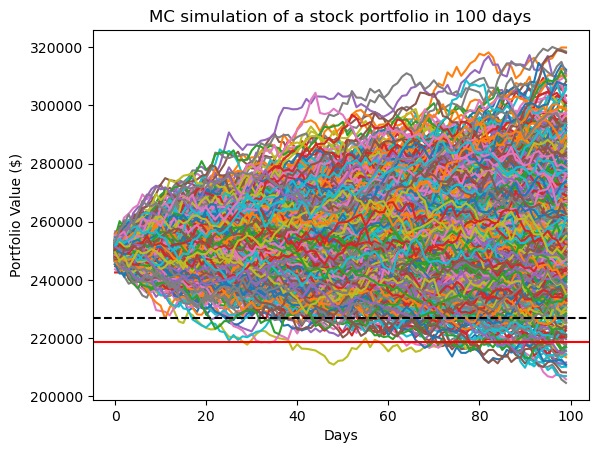

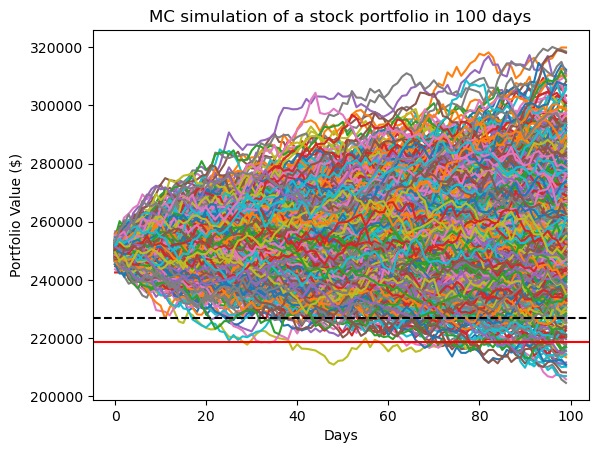

In [29]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.axhline(y = initialPortfolio - VaR, color = 'black', linestyle ="--", label = "VaR")
plt.axhline(y = initialPortfolio - CVaR, color = 'red', linestyle ="-", label = "CVaR")
plt.title('MC simulation of a stock portfolio in 100 days')
plt.show()

In [20]:
#Portfolio Returns Statistics on the 100th day

Avg_portf_returns = np.mean(portfolio_sims)
SD_portf_returns = np.std(portfolio_sims)
Median_portf_returns = np.median(portfolio_sims)

print('Avg_portf_returns ${}'.format(round(Avg_portf_returns,2)))
print('SD_portf_returns ${}'.format(round(SD_portf_returns,2)))
print('Median_portf_returns ${}'.format(round(Median_portf_returns,2)))

#95% confidence Interval of portfolio returns on the 100th day
Avg_CI = np.quantile(portfolio_sims, np.array([0.025, 0.975]))
print(Avg_CI)

Avg_portf_returns $254231.96
SD_portf_returns $13689.95
Median_portf_returns $252907.88
[229064.71733994 285264.28124736]
Avg_portf_returns $254231.96
SD_portf_returns $13689.95
Median_portf_returns $252907.88
[229064.71733994 285264.28124736]


## Stock & Porfolio Beta 

In [21]:
def get_stock_betas(stock_list):
    stock_betas = {}
    for stock in stock_list:
        try:
            # Download historical data for the stock
            stock_data = yf.download(stock, period='5y', interval='1mo')
            # Calculate monthly returns
            stock_returns = stock_data['Adj Close'].pct_change().dropna()
            market_data = yf.download('^AXJO', period='5y', interval='1mo')  # Download ASX 200 data
            market_returns = market_data['Adj Close'].pct_change().dropna()
            # Perform linear regression to calculate beta
            model = sm.OLS(stock_returns, market_returns).fit()
            beta = model.params[0]
            stock_betas[stock] = beta
#             print(f"Beta for {stock}: {beta:.2f}")
        except Exception as e:
            print(f"Error fetching data for {stock}: {e}")
            stock_betas[stock] = 0  # Set default beta value
    return stock_betas

def calculate_portfolio_beta(stock_betas, stock_weights):
    portfolio_beta = sum(beta * weight for beta, weight in zip(stock_betas.values(), stock_weights))
    return portfolio_beta



# Retrieve betas of individual stocks
stock_betas = get_stock_betas(stockList)

# Calculate portfolio beta
portfolio_beta = calculate_portfolio_beta(stock_betas, weights)
# print(f"Portfolio Beta: {portfolio_beta:.2f}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%***

## Expected Return of Portfolio (CAPM Method)

In [22]:
Tbond_rate = 0.043 # Risk-free rate (10-year US T-bonds)
index_symbol = '^AXJO'  # ASX 200 index symbol

def calculate_expected_return(beta, market_return, risk_free_rate):
    expected_return = risk_free_rate + beta * (market_return - risk_free_rate)
    return expected_return

risk_free_rate = Tbond_rate  

market_data = yf.download(index_symbol, start=startDate, end=endDate)['Adj Close']
market_return = market_data.pct_change().mean()  # Mean return as market return

expected_returns = {}
for stock, beta in stock_betas.items():
    expected_returns[stock] = calculate_expected_return(beta, market_return, risk_free_rate)

# Print expected returns of each stock
for stock, expected_return in expected_returns.items():
#     print(f"Expected return of {stock}: {expected_return:.2%}")


    portfolio_expected_return = np.dot(weights, [expected_returns[stock] for stock in stockList])

# print('expected portfolio value: ${}'.format(round(initialPortfolio * (1 + portfolio_expected_return),2)))

[*********************100%%**********************]  1 of 1 completed



## Standard Deviation of Portfolio (Covariance Matrix Method)

In [23]:
# Function to retrieve monthly returns of a stock
def get_monthly_returns(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=startDate, end=endDate)['Adj Close']
    monthly_returns = stock_data.resample('M').ffill().pct_change().dropna()
    return monthly_returns

# Dictionary to store monthly returns of each stock
monthly_returns_dict = {}

# Retrieve monthly returns of each stock
for stock_symbol in stockList:
    monthly_returns_dict[stock_symbol] = get_monthly_returns(stock_symbol, startDate, endDate)

# Combine monthly returns into a single DataFrame
returns_df = pd.concat(monthly_returns_dict, axis=1)

# Calculate covariance matrix
covariance_matrix = returns_df.cov()

# Calculate portfolio standard deviation
portfolio_std_deviation = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

# Print standard deviation of the portfolio
# print(f"Standard deviation of the portfolio: {portfolio_std_deviation:.2%}")
# print(f"Standard deviation of the portfolio: ${round(initialPortfolio * portfolio_std_deviation,2)}")

# Calculate and print standard deviation for individual stocks
for stock_symbol in stockList:
    stock_std_deviation = returns_df[stock_symbol].std()
#     print(f"Standard deviation of {stock_symbol}: {stock_std_deviation:.2%}")

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



## Correlation of individual stock in a portfolio and ASX 200

In [24]:
def get_portfolio_data(stock_list, start_date, end_date):
    portfolio_data = pd.DataFrame()
    for stock in stock_list:
        try:
            # Download historical data for each stock
            stock_data = yf.download(stock, start=startDate, end=endDate)['Adj Close']
            # Rename column to stock symbol
            stock_data = stock_data.rename(stock)
            # Concatenate data to portfolio dataframe
            portfolio_data = pd.concat([portfolio_data, stock_data], axis=1)
        except Exception as e:
            print(f"Error fetching data for {stock}: {e}")
    return portfolio_data


# Get historical data for the portfolio and ASX 200 index
portfolio_data = get_portfolio_data(stockList, startDate, endDate)
index_data = yf.download(index_symbol, start=startDate, end=endDate)['Adj Close']

# Drop NaN values
portfolio_data.dropna(inplace=True)
index_data.dropna(inplace=True)

# Calculate correlation
correlation = portfolio_data.corrwith(index_data)

# print("Correlation between the portfolio and ASX 200 index:")
# print(correlation)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed



## Portfolio Statistical dataframe  

In [25]:
std_deviations = []
for stock_symbol in stockList:
    stock_std_deviation = returns_df[stock_symbol].std()
    std_deviations.append(stock_std_deviation)

std_deviations_array = np.array(std_deviations)
correl = correlation.values
values = list(expected_returns.values())
expRtn = np.array(values)
portStat_col = [['Ticker', 'St.Dev', 'Exp.Rtn', 'Correl (^AXJO)']]
portStat_df = pd.DataFrame(columns=portStat_col)

portStat_df['Ticker'] = stockList
portStat_df['St.Dev'] = std_deviations_array
portStat_df['Exp.Rtn'] = expRtn
portStat_df['Correl (^AXJO)'] = correl

In [26]:
# portStat_df.set_index('Ticker', inplace=True)
portStat_df

,Ticker,St.Dev,Exp.Rtn,Correl (^AXJO)
0,IAG.AX,0.043937,0.032721,0.591987
1,GUD.AX,0.094844,0.014588,0.257758
2,SHL.AX,0.052781,0.006277,0.016720
3,NHF.AX,0.062661,0.030358,0.269066
4,CTD.AX,0.123144,-0.039705,0.295111
5,AZJ.AX,0.048050,0.014750,0.835105
6,NEC.AX,0.070401,-0.021330,-0.315707
7,HVN.AX,0.051091,-0.002011,0.781572
8,BXB.AX,0.048564,0.012169,0.569327
9,BAP.AX,0.084606,0.003522,-0.120789


,Ticker,St.Dev,Exp.Rtn,Correl (^AXJO)
0,IAG.AX,0.043937,0.032721,0.591987
1,GUD.AX,0.094844,0.014588,0.257758
2,SHL.AX,0.052781,0.006277,0.016720
3,NHF.AX,0.062661,0.030358,0.269066
4,CTD.AX,0.123144,-0.039705,0.295111
5,AZJ.AX,0.048050,0.014750,0.835105
6,NEC.AX,0.070401,-0.021330,-0.315707
7,HVN.AX,0.051091,-0.002011,0.781572
8,BXB.AX,0.048564,0.012169,0.569327
9,BAP.AX,0.084606,0.003522,-0.120789


In [28]:
print(f"Standard deviation of the portfolio: {portfolio_std_deviation:.2%}")
print(f"Standard deviation of the portfolio: ${round(initialPortfolio * portfolio_std_deviation,2)}")
print('expected portfolio value: ${}'.format(round(initialPortfolio * (1 + portfolio_expected_return),2)))
print(f"Portfolio Beta: {portfolio_beta:.2f}")
print(f"Mean Correlation of the portfolio with ^AXJO: {correl.mean():.2}")
print(f"Total equity postition of the portfolio: ${round(total_cost,2)}")
Orders = top_df[['Ticker','Price', 'Number of Shares to Buy']]
Orders

Standard deviation of the portfolio: 3.86%
Standard deviation of the portfolio: $9652.81
expected portfolio value: $251283.68
Portfolio Beta: 0.89
Mean Correlation of the portfolio with ^AXJO: 0.32
Total equity postition of the portfolio: $249943.31


,Ticker,Price,Number of Shares to Buy
68,IAG.AX,6.315,3958
62,GUD.AX,11.790,2120
118,SHL.AX,28.325,882
92,NHF.AX,7.570,3302
44,CTD.AX,17.080,1463
16,AZJ.AX,3.990,6265
91,NEC.AX,1.735,14409
67,HVN.AX,4.950,5050
25,BXB.AX,15.335,1630
17,BAP.AX,6.175,4048


Standard deviation of the portfolio: 3.86%
Standard deviation of the portfolio: $9652.81
expected portfolio value: $251283.68
Portfolio Beta: 0.89
Mean Correlation of the portfolio with ^AXJO: 0.32
Total equity postition of the portfolio: $249943.31


,Ticker,Price,Number of Shares to Buy
68,IAG.AX,6.315,3958
62,GUD.AX,11.790,2120
118,SHL.AX,28.325,882
92,NHF.AX,7.570,3302
44,CTD.AX,17.080,1463
16,AZJ.AX,3.990,6265
91,NEC.AX,1.735,14409
67,HVN.AX,4.950,5050
25,BXB.AX,15.335,1630
17,BAP.AX,6.175,4048


In [ ]:
Orders.to_csv("Orders")

In [ ]:


# # Fetch historical price data for CBA.AX
# stock_data = yf.Ticker("BHP.AX").history(period="1y")

# # Calculate one-year price return
# one_year_return = (stock_data.iloc[-1]['Close'] - stock_data.iloc[0]['Close']) / stock_data.iloc[0]['Close'] * 100

# # Fetch historical price data for the last 6 months
# six_months_data = yf.Ticker("CBA.AX").history(period="6mo")

# # Calculate six-month price return
# six_month_return = (six_months_data.iloc[-1]['Close'] - six_months_data.iloc[0]['Close']) / six_months_data.iloc[0]['Close'] * 100

# # Fetch historical price data for the last 3 months
# three_months_data = yf.Ticker("CBA.AX").history(period="3mo")

# # Calculate three-month price return
# three_month_return = (three_months_data.iloc[-1]['Close'] - three_months_data.iloc[0]['Close']) / three_months_data.iloc[0]['Close'] * 100

# # Fetch historical price data for the last 1 month
# one_month_data = yf.Ticker("CBA.AX").history(period="1mo")

# # Calculate one-month price return
# one_month_return = (one_month_data.iloc[-1]['Close'] - one_month_data.iloc[0]['Close']) / one_month_data.iloc[0]['Close'] * 100

# print("One-Year Price Return:", one_year_return, "%")
# print("Six-Month Price Return:", six_month_return, "%")
# print("Three-Month Price Return:", three_month_return, "%")
# print("One-Month Price Return:", one_month_return, "%")
